# Percolation

This notebook shows how to use [GEMDAT](https://gemdat.readthedocs.org) to compute the shortest percolating path.

It first computes the free energy on a discretized gride from the trajectory, then it finds the nearest sites of the structure to each point of the grid to map the space. The density probability is also used to initialize the percolation search. The user has then to specify in which of the cartesian directions the percolation has to happen (multiple selection is allowed). After selecting the metric for path evaluation, GEMDAT returns the best percolating path.

As input you will need:

1. discretized grid resolution
    - float value
2. Percolation directions

The resulting path can be analyzed and plotted in 3d, together with the energy profile along the path.

## Loading data

Load simulation data and reference jump sites.

In [1]:
from gemdat import Trajectory
from gemdat.io import load_known_material
from gemdat.utils import VASPRUN

# Use your own data:
# VASPRUN = 'path/to/your/vasprun.xml'

trajectory = Trajectory.from_vasprun(VASPRUN)
diff_trajectory = trajectory.filter('Li')

sites = load_known_material('argyrodite', supercell=(2, 1, 1))

/home/stef/python/gemdat/.venv/lib64/python3.12/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


## Get free energy volume

Percolation works with the free energy of the system. This can be obtained from the density volume of the diffusing element represented as the free energy, `F`.

In [2]:
volume = diff_trajectory.to_volume(resolution=0.45)

F = volume.get_free_energy(temperature=trajectory.metadata['temperature'])

/home/stef/python/gemdat/src/gemdat/volume.py:361: RuntimeWarning: divide by zero encountered in log
  'Boltzmann constant in eV/K'][0] * np.log(prob)


## Find best percolating path

Look for the lowest-energy path that percolates the system.
It is possible to set in which direction(s) the path has to percolate, with the `percolate_XXX` flags.

In [3]:
from gemdat.path import find_best_perc_path

best_path = find_best_perc_path(
    F, volume=volume, percolate_x=True, percolate_y=False, percolate_z=False
)

best_path

Path: (18, 15, 10) -> (18, 15, 10)
Steps: 45
Total energy: 20.809 eV

Plot the best percolating path.

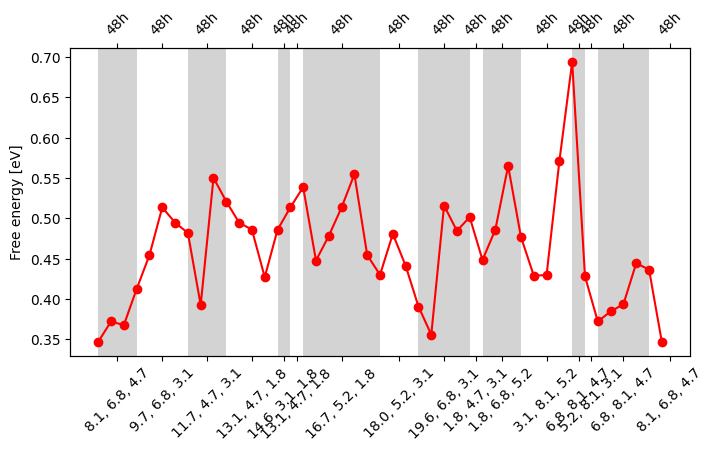

In [4]:
from gemdat import plots

fig1 = volume.plot_density(paths=best_path, structure=sites)
fig1.show()

fig2 = plots.energy_along_path(paths=best_path, volume=volume, structure=sites);